### Importing libraries

In [1]:
pip install pandas

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split

#### Loading and Displaying Dataset using pandas

In [4]:

dataset=pd.read_csv("Crop_recommendation (2).csv")

In [5]:

dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### this is a classification problem where the output will be a categorical form

#### Finding Crop Dataset details and information

In [6]:
dataset.shape

(2200, 8)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### Exploring Dataset

In [11]:
corr=dataset.drop(['label'],axis=1).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

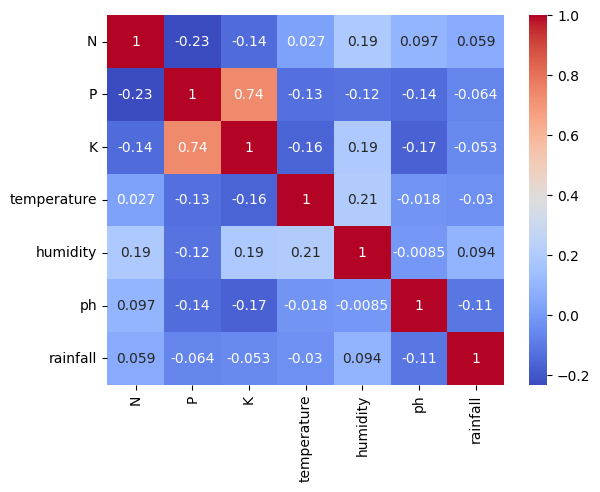

In [12]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [13]:
dataset['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

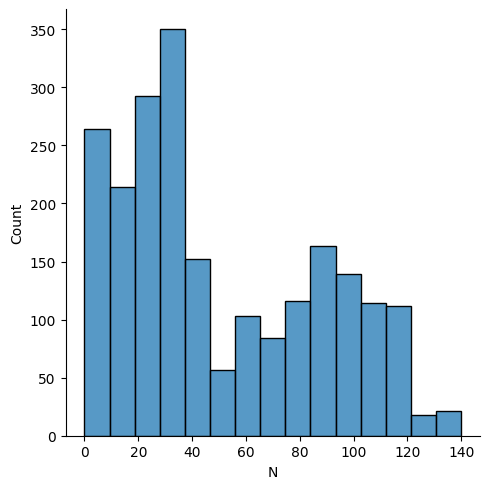

In [14]:
sns.displot(dataset['N'])

#### Converting Categorical varibales to a integer format

In [17]:

crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
dataset['crop_num']=dataset['label'].map(crop_dict)

In [18]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


#### Removing Label column from the dataset

In [19]:
dataset=dataset.drop('label',axis=1)

### Training , Testing and Splitting Dataset

In [20]:
X=dataset.drop('crop_num',axis=1) # features
Y=dataset['crop_num'] #target

In [21]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [22]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
X_train.shape

(1760, 7)

In [25]:
X_test.shape

(440, 7)

In [26]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


### Model Building

#### Importing all the classification models

#### Creating an Instance for building all models at once

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(Y_test,ypred)}")

c:\Users\S Eswara Rao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  with accuracy : 0.9454545454545454
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9613636363636363
K-Nearest Neighbors  with accuracy : 0.9704545454545455
Decision Tree  with accuracy : 0.9863636363636363
Random Forest  with accuracy : 0.9954545454545455
Bagging  with accuracy : 0.9840909090909091


c:\Users\S Eswara Rao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.9068181818181819


### From the Above Accuracies, We have adopt Random Forest as it has Maximum Accuracy

In [28]:

classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)
ypred=classifier.predict(X_test)

In [29]:

accuracy_score(Y_test,ypred)*100

99.31818181818181

In [30]:
classifier=KNeighborsClassifier()
classifier.fit(X_train,Y_train)
ypred=classifier.predict(X_test)
accuracy_score(Y_test,ypred)*100

97.04545454545455

### Sample Predictions

In [31]:

def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = classifier.predict(features).reshape(1,-1)

    return prediction[0]

In [32]:

N = 4
P = 50
k = 0
temperature = 40
humidity = 20
ph = 10
rainfall = 10


predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}


if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Mothbeans is a best crop to be cultivated 


c:\Users\S Eswara Rao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [33]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [34]:
!pip install gradio

In [35]:
import gradio as gr
def predict_crop(N,P,k,temperature,humidity,ph,rainfall):
    knn = KNeighborsClassifier()
    knn.fit(X_train,Y_train)
    features=[[N,P,k,temperature,humidity,ph,rainfall]]
    pred=knn.predict(features)[0]
    if pred==1:
       target="Rice"

    elif pred==2:
       target="Maize"
    elif pred==3:
       target="Jute"
    elif pred==4:
       target="Cotton"
    elif pred==5:
       target="Coconut"
    elif pred==6:
       target="Papaya"
    elif pred==7:
       target="Orange"
    elif pred==8:
       target="Apple"
    elif pred==9:
       target="Muskmelon"
    elif pred==10:
       target="Watermelon"
    elif pred==11:
       target="Grapes"
    elif pred==12:
       target="Mango"
    elif pred==13:
       target="Banana"
    elif pred==14:
       target="Pomegranate"
    elif pred==15:
       target="Lentil"
    elif pred==16:
       target="Blackgram"
    elif pred==17:
       target="Mungbean"
    elif pred==18:
       target="Mothbeans"
    elif pred==19:
       target="Pigeonpeas"
    elif pred==20:
       target="Kidneybeans"
    elif pred==21:
       target="Chickpea"
    elif pred==22:
      target="Coffee"
    else:
      target="Sorry are not able to recommend a proper crop for this environment"



    return target
demo=gr.Interface(fn=predict_crop,title="Crop Recommendation",
                  theme=gr.themes.Soft(),

                   description=''' Crop recommendation is a process of suggesting the most suitable crops for cultivation in a given area based on various factors such as soil type, climate, water availability, and local agricultural practices. The goal of crop recommendation systems is to help farmers make informed decisions about crop selection, optimize yield, and improve overall agricultural productivity.<br>Crop recommendation systems can help farmers optimize resource allocation, minimize risks, and maximize returns on investment by selecting the most suitable crops for their specific agricultural conditions. Additionally, these systems can contribute to sustainable farming practices by promoting crop diversification and resilience to climate change. ''',

                  inputs=["number","number","number","number","number","number","number"],outputs="text")
demo.launch(debug=True)



c:\Users\S Eswara Rao\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


In [36]:
import gradio as gr
import pickle

# Load the pre-trained model (replace 'model.pkl' with your model file name)
with open('classifier.pkl', 'rb') as f:
    knn = pickle.load(f)

def predict_crop(N, P, k, temperature, humidity, ph, rainfall):
    features = [[N, P, k, temperature, humidity, ph, rainfall]]
    pred = knn.predict(features)[0]
    
    if pred == 1:
        target = "Rice"
    elif pred == 2:
        target = "Maize"
    elif pred == 3:
        target = "Jute"
    elif pred == 4:
        target = "Cotton"
    elif pred == 5:
        target = "Coconut"
    elif pred == 6:
        target = "Papaya"
    elif pred == 7:
        target = "Orange"
    elif pred == 8:
        target = "Apple"
    elif pred == 9:
        target = "Muskmelon"
    elif pred == 10:
        target = "Watermelon"
    elif pred == 11:
        target = "Grapes"
    elif pred == 12:
        target = "Mango"
    elif pred == 13:
        target = "Banana"
    elif pred == 14:
        target = "Pomegranate"
    elif pred == 15:
        target = "Lentil"
    elif pred == 16:
        target = "Blackgram"
    elif pred == 17:
        target = "Mungbean"
    elif pred == 18:
        target = "Mothbeans"
    elif pred == 19:
        target = "Pigeonpeas"
    elif pred == 20:
        target = "Kidneybeans"
    elif pred == 21:
        target = "Chickpea"
    elif pred == 22:
        target = "Coffee"
    else:
        target = "Sorry, we are not able to recommend a proper crop for this environment"
    
    return target

demo = gr.Interface(fn=predict_crop, title="Crop Recommendation",
                    theme=gr.themes.Soft(),
                    description='''Crop recommendation is a process of suggesting the most suitable crops for cultivation in a given area based on various factors such as soil type, climate, water availability, and local agricultural practices. The goal of crop recommendation systems is to help farmers make informed decisions about crop selection, optimize yield, and improve overall agricultural productivity.<br>Crop recommendation systems can help farmers optimize resource allocation, minimize risks, and maximize returns on investment by selecting the most suitable crops for their specific agricultural conditions. Additionally, these systems can contribute to sustainable farming practices by promoting crop diversification and resilience to climate change.''',
                    inputs=["number", "number", "number", "number", "number", "number", "number"],
                    outputs="text")

demo.launch(debug=True)


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


In [38]:
from sklearn.model_selection import train_test_split

# Assuming X (features) and y (labels) are defined
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


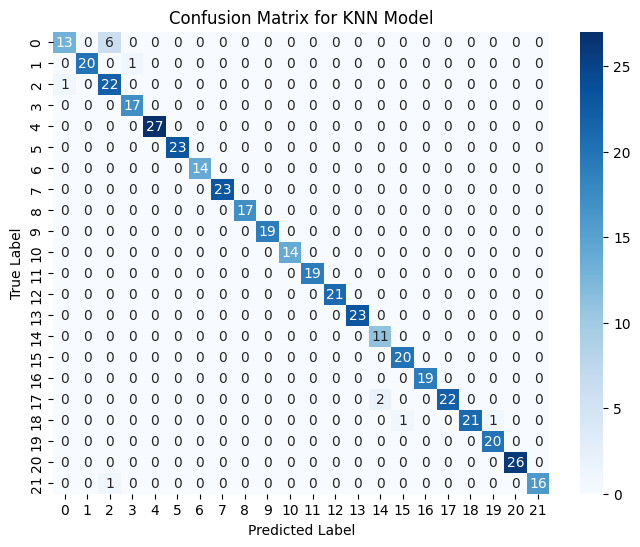

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Model")
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()



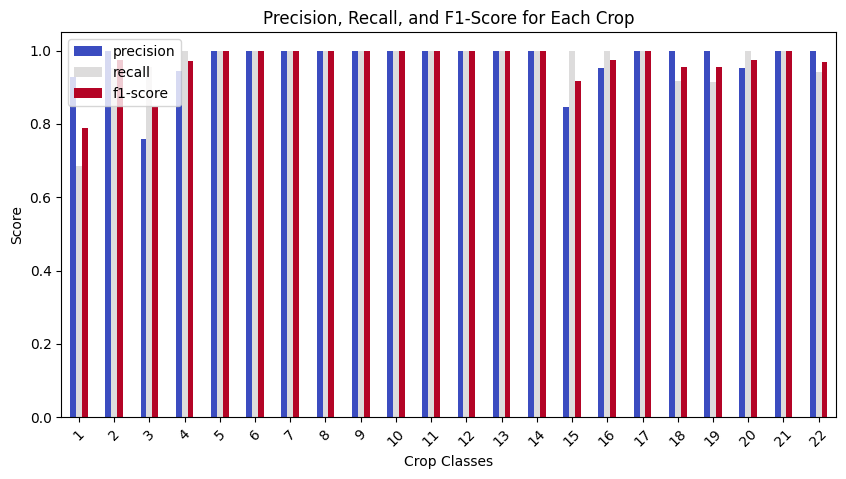

In [41]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report.iloc[:-3, :-1].plot(kind="bar", figsize=(10,5), colormap="coolwarm")
plt.title("Precision, Recall, and F1-Score for Each Crop")
plt.xlabel("Crop Classes")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.savefig("Precision,Recall and F1-score For Each Crop.png", dpi=300)
plt.show()


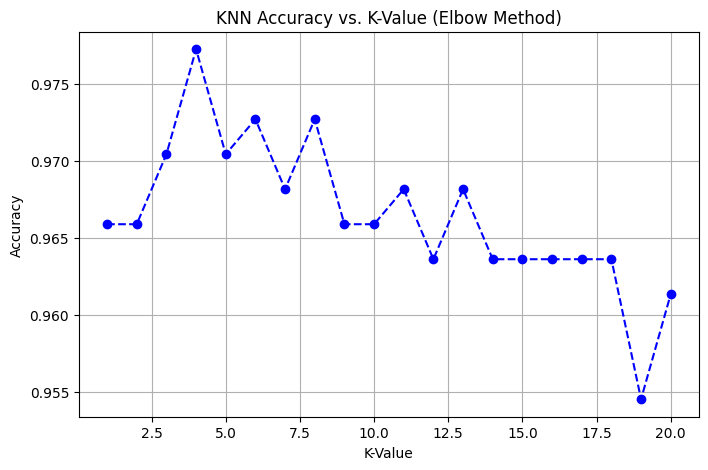

In [42]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. K-Value (Elbow Method)")
plt.grid()
plt.savefig("Acuuracy Vs K-value (Elbow Method)");
plt.show()


In [49]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Sample Data (Replace with actual dataset)
data = pd.read_csv("crop_recommendation (2).csv")  # Ensure your dataset is available

X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values
y = data['label'].values  # Crop category labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Save the trained model
with open('classifier.pkl', 'wb') as f:
    pickle.dump(knn, f)

print("Model trained and saved successfully!")


Model trained and saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 📂 Load Dataset (Replace with your actual dataset file)
df = pd.read_csv("crop_recommendation (2).csv")  # Ensure the dataset is in the same folder

# 🔍 Check the dataset structure
print(df.head())

# 🚀 Extract Features and Labels
X = df.iloc[:, :-1].values  # All columns except last (Features)
y = df.iloc[:, -1].values   # Last column (Crop labels)

# 🔄 Convert Crop Labels to Numerical Values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 🔄 Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙️ Standardize Features (Important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔍 Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # Change k if needed
knn.fit(X_train, y_train)

# 📊 Evaluate Model Performance
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ KNN Model Accuracy: {accuracy:.2f}")

# 💾 Save the Model & Scaler
with open("classifier.pkl", "wb") as model_file:
    pickle.dump(knn, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

with open("label_encoder.pkl", "wb") as encoder_file:
    pickle.dump(label_encoder, encoder_file)

print("🎯 Model, Scaler, and Label Encoder Saved Successfully!")
